# Lab | Cleaning categorical data - scroll down for this lab


# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the `customer_value_analysis.csv` into the variable `customer_df`.
3. First look at its main features (`head`, `shape`, `info`).
4. Rename the columns so they follow the _PE8_ (snake case: lowecase_with_underscores).
5. Change the type of `effective_to_date` column to DateTime format.
6. Check `NaN` values per column.
7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.
8. Drop any ID column.
9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function **must have an optional argument set by default to 36** to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df. 
11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16). 
12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
13. According to the previous histogram plots, do you think that you will have to apply any transformation?
14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.


In [1]:
## 1. Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## 2. Load the customer_value_analysis.csv into the variable customer_df.

customer_df = pd.read_csv('/Users/Ana/Desktop/Ironhack/Week_4/Day_1/Morning/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
## 3. First look at its main features (head, shape, info).

customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
## 4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores)

customer_df= customer_df.rename(columns=str.lower)

customer_df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [7]:
customer_df.columns = [c.replace(' ', '_') for c in customer_df]
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [48]:
## 5. Change the type of effective_to_date column to DateTime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [49]:
## 6. Check NaN values per column.

customer_df.isnull().sum() #no NaN values!!


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [50]:
## 7. Define a function that given an input dataframe, returns two dataframes: 
# one with numerical columns and another with categorical columns of the input dataframe.

cstdf = customer_df.copy() #first i make a copy
cstdf.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [70]:
def separate_num_cat(df):
    num_df = df.select_dtypes(include=[np.number, np.datetime64])
    cat_df = df.select_dtypes(exclude=[np.number, np.datetime64])
    return num_df, cat_df

In [71]:
num_df, cat_df = separate_num_cat(cstdf)
display(num_df.head())
display(cat_df.head())

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,2011-02-24,56274,69,32,5,0,1,384.811147
1,6979.535903,2011-01-31,0,94,13,42,0,8,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,0,2,566.472247
3,7645.861827,2011-01-20,0,106,18,65,0,7,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,0,1,138.130879


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [72]:
## 8. Drop any ID column

cstdf = cstdf.drop('customer', axis=1)
cstdf.head()



,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [73]:
cat_df = cat_df.drop('customer', axis=1)
cat_df.head()



,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


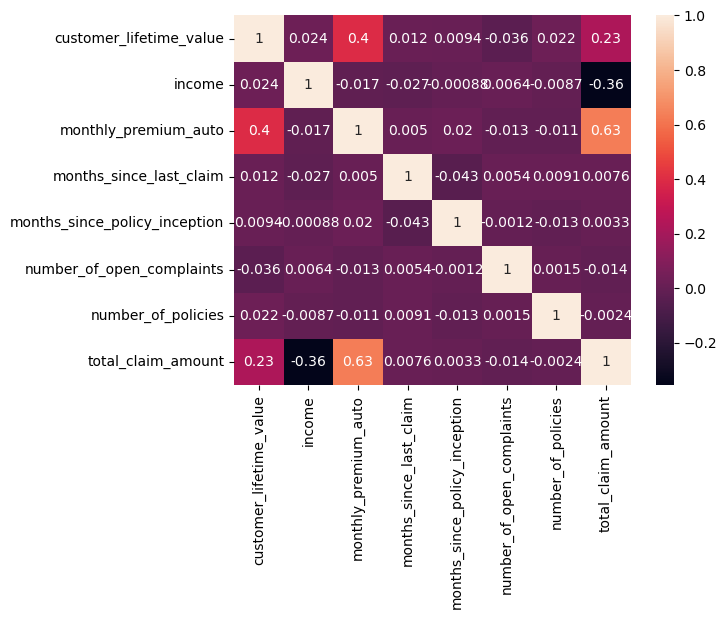

In [75]:
## 9.Get the correlation matrix for the numerical variables. 


correlations_matrix = num_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# What is the pair of numerical variables that have the highest correlation? It makes sense, why?

# total_claim_amount and monthly_premium_auto with a correlation index of 0.63 
# because the customers that pay more, also can claim more money

In [76]:
## 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: 
# the first containing numerical continuous columns and the second containing numerical discrete 
# columns of the input dataframe. To this end, it might be helpful to count the number of unique values. 
# The function must have an optional argument set by default to 36 to discriminate between continuous 
# and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.
    
    
def split_cont_disc(df):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    for col in df.columns:
        if df[col].nunique() > 36: #because for more than 36 then it is continuous
            continuous_df[col] = df[col]
        else:
            discrete_df[col] = df[col]

    return continuous_df, discrete_df


In [77]:
continuous_df, discrete_df = split_cont_disc(num_df)
display(continuous_df.head())
display(discrete_df.head())

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,2011-02-24,56274,69,5,384.811147
1,6979.535903,2011-01-31,0,94,42,1131.464935
2,12887.431650,2011-02-19,48767,108,38,566.472247
3,7645.861827,2011-01-20,0,106,65,529.881344
4,2813.692575,2011-02-03,43836,73,44,138.130879


,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [78]:
display(discrete_df.head())

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1


In [79]:
## 11. Create a function to create a barplot for all the columns 
# of the discrete_df using seaborn, and set the figuresize = (16,16).

def create_barplot(df):
    plt.figure(figsize=(16, 16))
    for col in df.columns:
        #I found this bit below that creates a grid so I implemented it to all my subplots functions 
        plt.subplot(len(df.columns)//2 + 1, 2, df.columns.get_loc(col) + 1) 
        sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts()) 
        # where x = group by every element (number of months, complains or policies etc), and y = number of elements
        plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

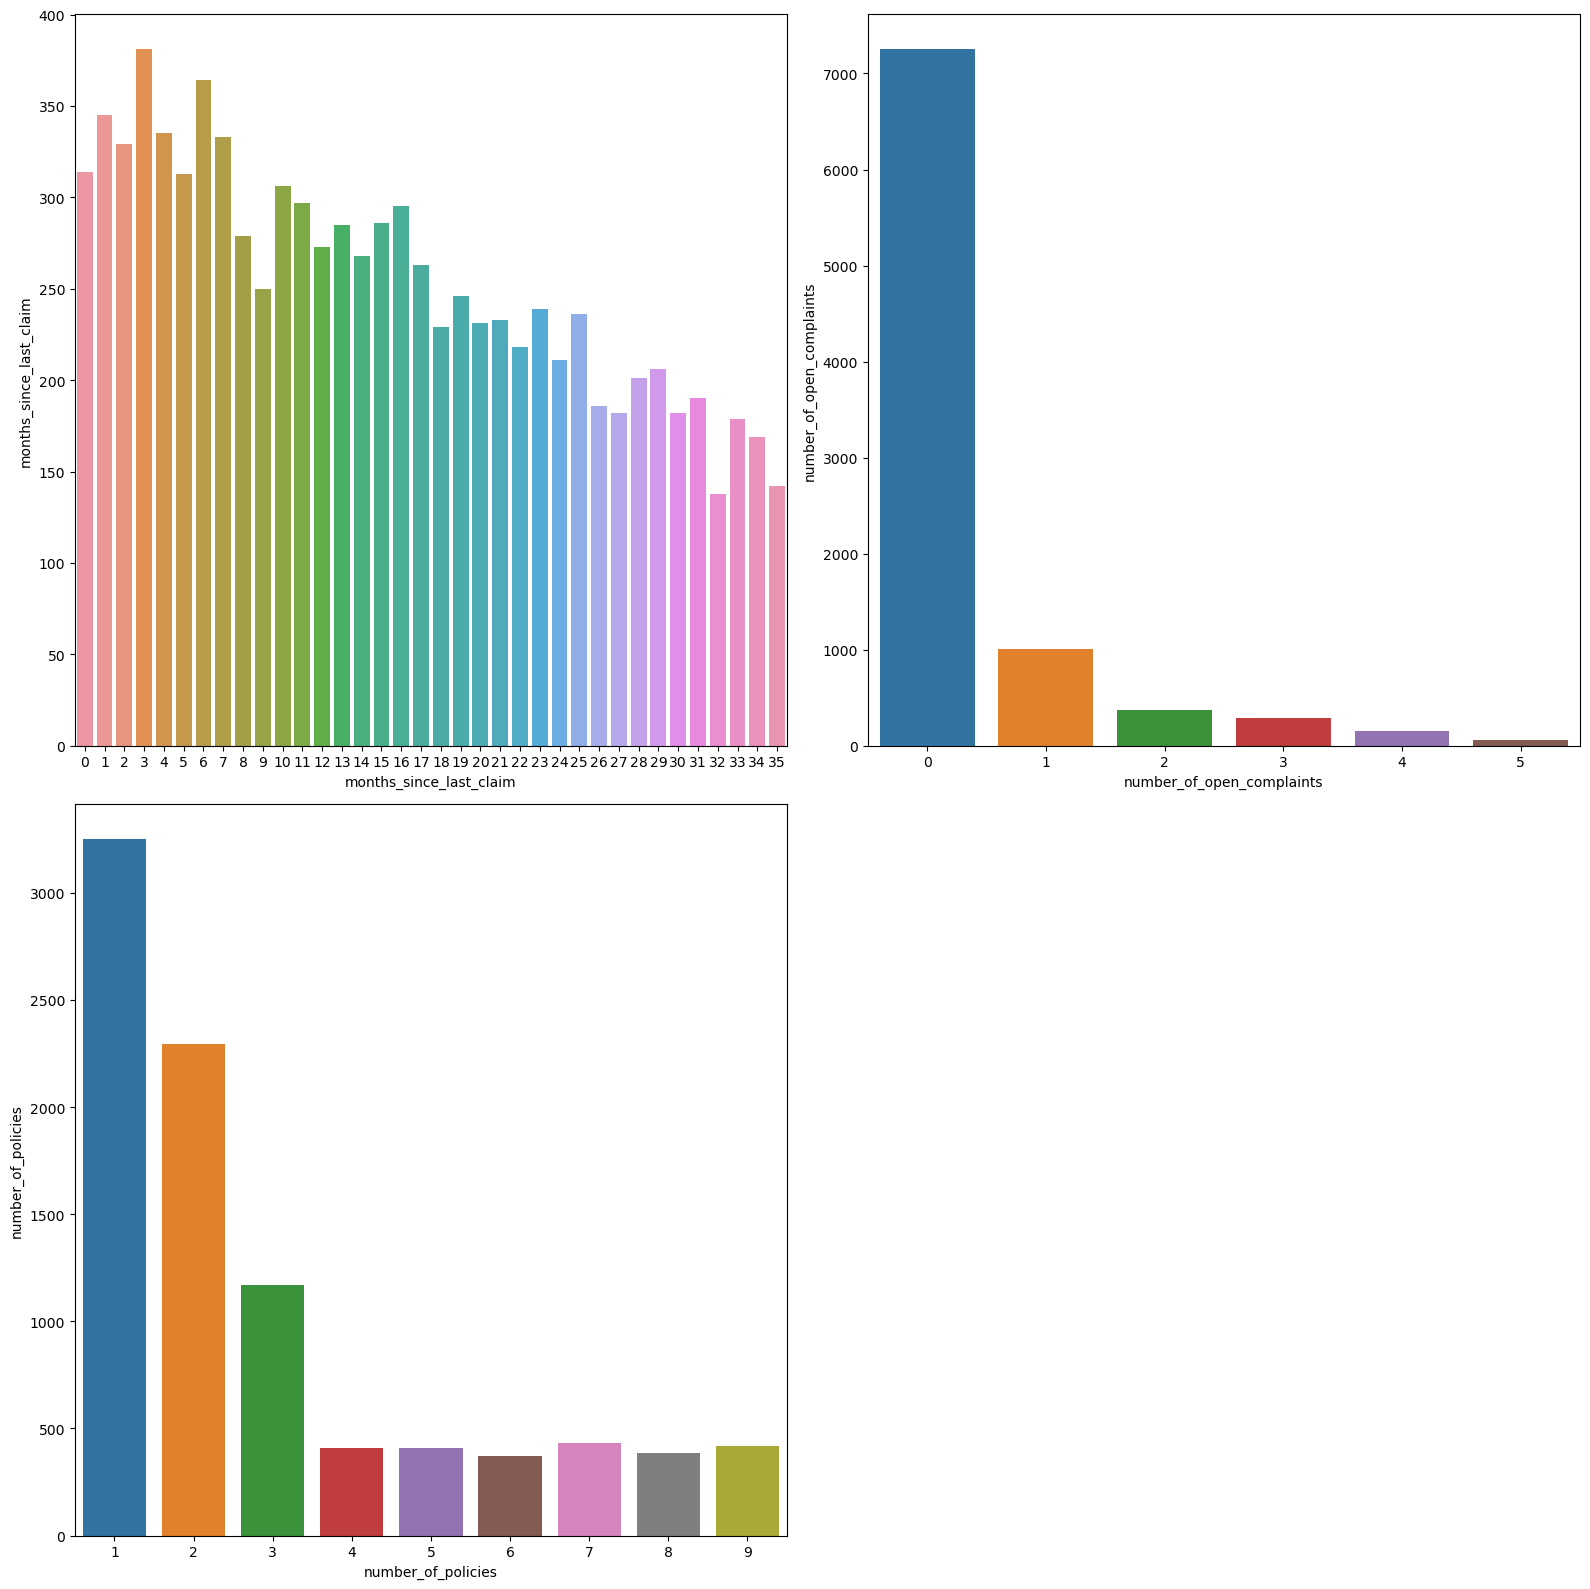

In [80]:
create_barplot(discrete_df)

In [81]:
## 12. Create a function to create a histogram for all the columns of the 
# continuous_df using seaborn, and set the figuresize = (16,16)

def cont_hist(df):
    plt.figure(figsize=(16,16))
    for col in df.columns:
        plt.subplot(len(df.columns)//2 + 1, 2, df.columns.get_loc(col) + 1)
        sns.histplot(x=df[col], bins = 15)
        plt.xlabel(col)
        
    plt.tight_layout()
    plt.show()

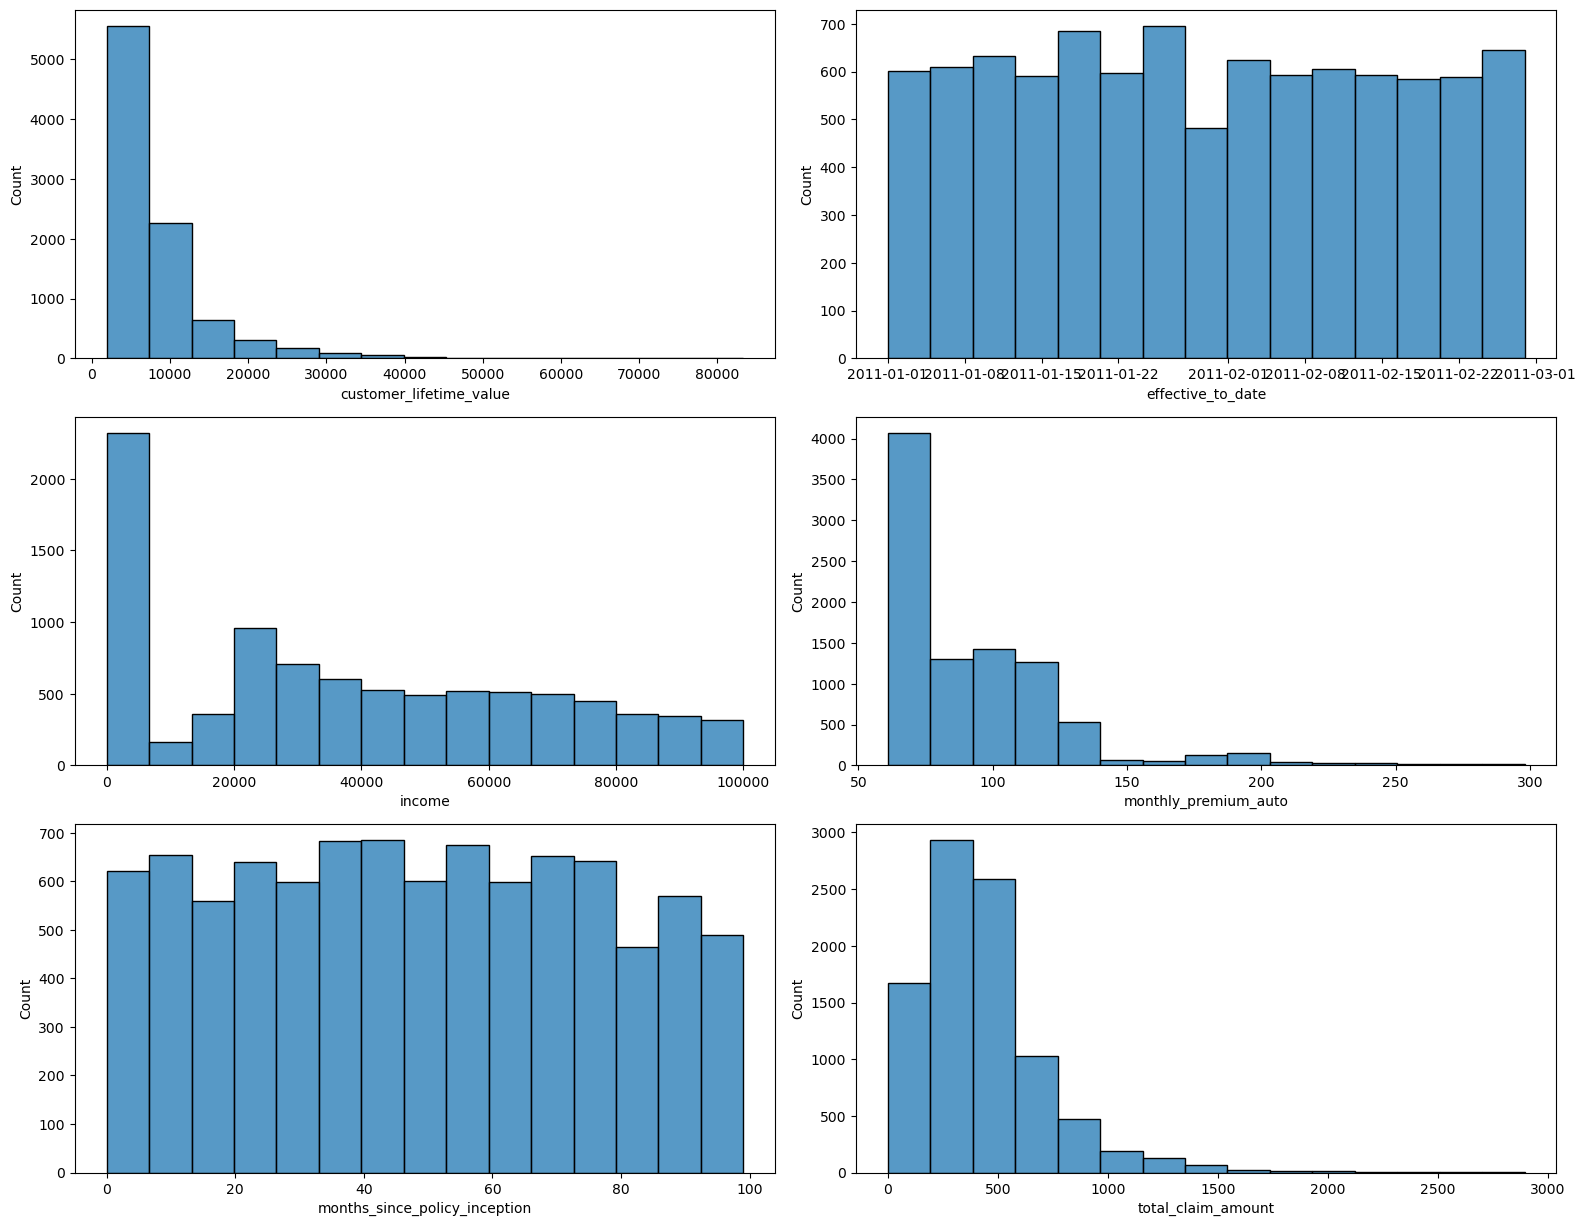

In [82]:
cont_hist(continuous_df)

In [22]:
## 13. According to the previous histogram plots, do you think that you will have to apply any transformation?

# Yes as they are all skewed

In [89]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_lifetime_value        9134 non-null   float64       
 1   effective_to_date              9134 non-null   datetime64[ns]
 2   income                         9134 non-null   int64         
 3   monthly_premium_auto           9134 non-null   int64         
 4   months_since_policy_inception  9134 non-null   int64         
 5   total_claim_amount             9134 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 428.3 KB


In [101]:
## 14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. 
# Define a function to create this kind of plot for the continuous_df.

#it is boxplot

def cont_boxplot(df):
    plt.figure(figsize=(16,16))
    for col in df.select_dtypes(include='number'): #because otherwise datetime gives an error
        plt.subplot(len(df.columns)//2 + 1, 2, df.columns.get_loc(col) + 1)
        sns.boxplot(data=df, x=col)
    plt.tight_layout()
    plt.show()

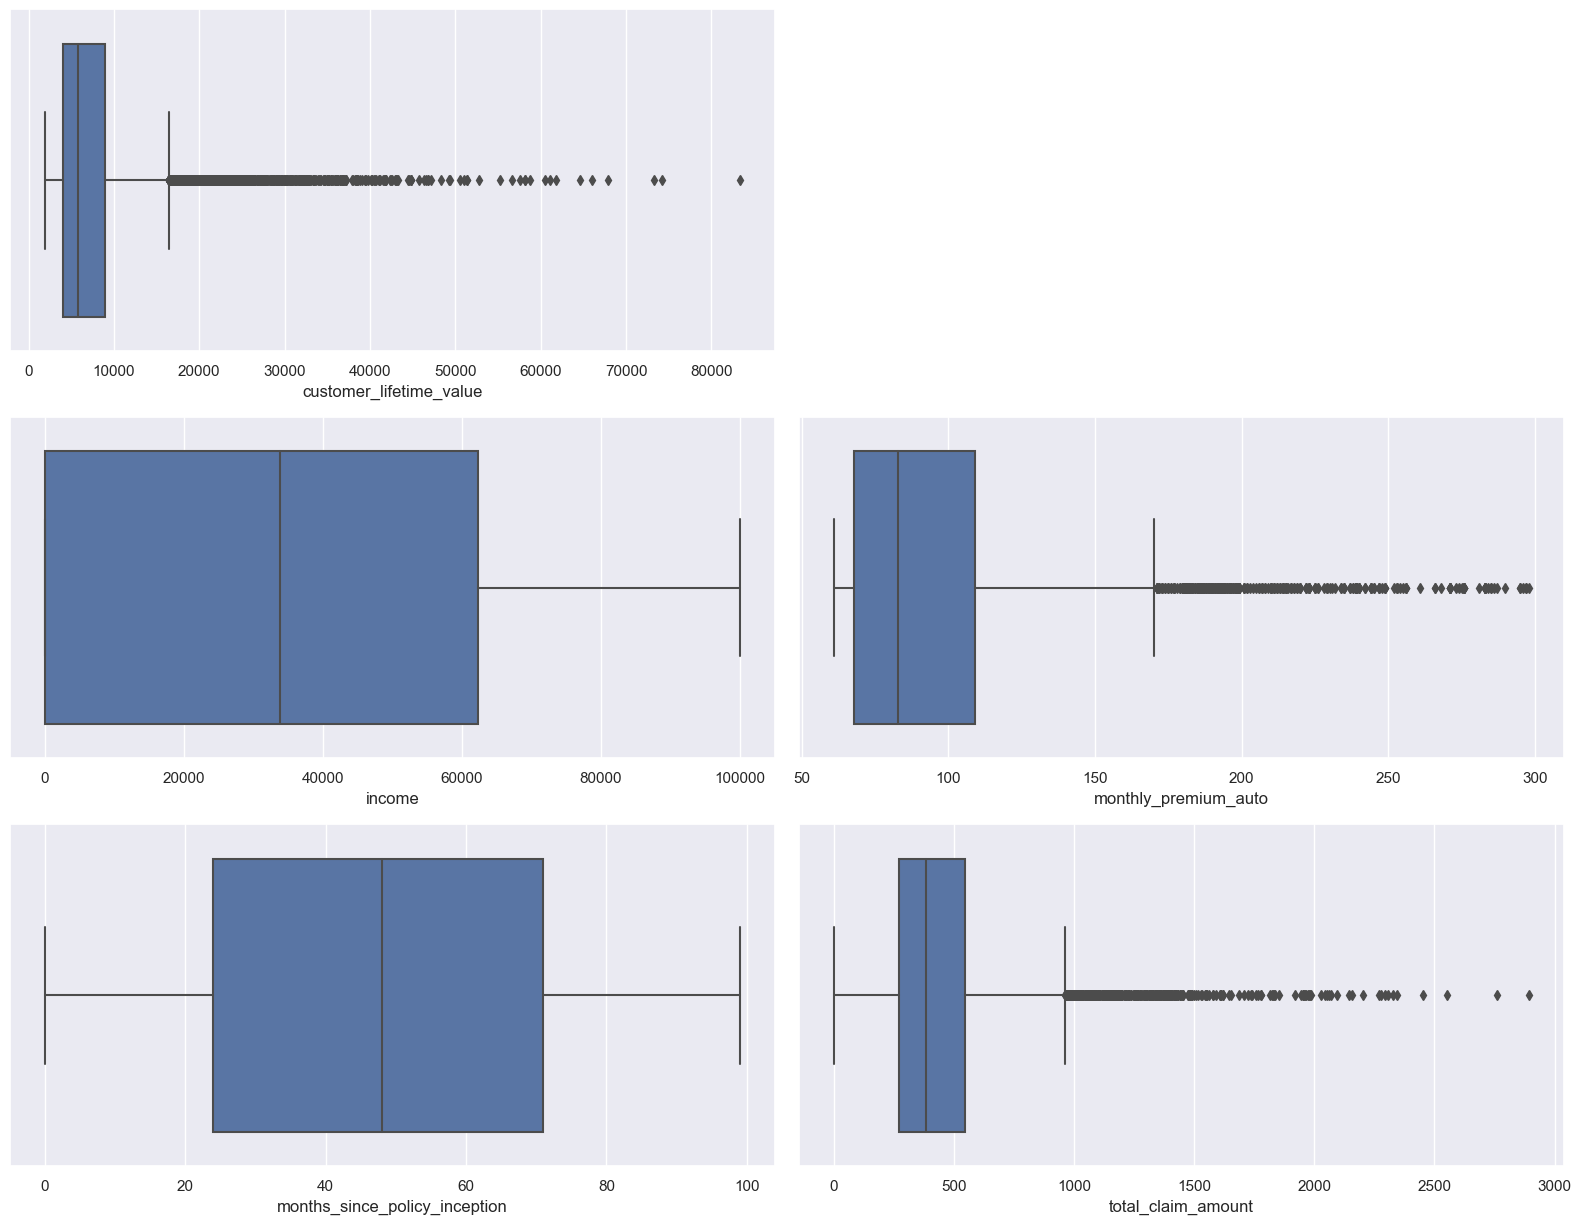

In [102]:
cont_boxplot(continuous_df)

In [103]:
# there are a lot of outliers in customer_lifetime_value, monthly_premium_auto and total_claim_amount

# Lab | Cleaning categorical data


1. Define a function that given a pandas DataFrame as input creates a **seaborn countplot** of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.
2. `policy_type` and `policy` columns are redundant, and what's worse `policy` column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column `policy_type` and transform the column `policy` to three possible values: L1, L2, and L3 using a function.
3. Time dependency analysis. Use a seaborn line plot using the column `effective_to_date` to see if `total_claim_amount` is bigger at some specific dates. Use a figsize=(10,10)
4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
* `day` with the day number of `effective_to_date`
* `day_name` with the day NAME of `effective_to_date`
* `week` with the week of `effective_to_date`
* `month` with the month NAME of `effective_to_date`
* `total_claim_amount` with `total_claim_amount`
5. Compute the total `target` column aggregated `day_name` rounded to two decimals and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_days)`
6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?
7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using `.reindex(index=list_of_correct_values)`
9. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()
10. Plot the median "target" by day of the week name using a seaborn barplot
11. What can you conclude from this analysis?
12. Compute the total `target` column aggregated `month` rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
13. Can you do a monthly analysis given the output of the previous series? Why?
14. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).
15. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.
16. Concatenate the `continuous_cleaned_df`, `discrete_df`, `categorical_df`, and the relevant column of `time_df`. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using `pd.concat()`) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use `pd.dropna()` and `.reset_index()` to fix the final dataframe.
17. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.
18. Turn the `response` column values into (Yes=1/No=0).
19. Reduce the class imbalance in `education` by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
20. Reduce the class imbalance of the `employmentstatus` column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
21. Deal with column `Gender` turning the values into (1/0).
22. Now, deal with `vehicle_class` grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called `Luxury` leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
23. Now it's time to deal with the **categorical ordinal columns**, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".
24. Encode the column `employmentstatus` as: "Employed" > "Inactive" > "Unemployed".
25. Encode the column `location_code` as: "Urban" > "Suburban" > "Rural".
26. Encode the column `vehicle_size` as: "Large" > "Medsize" > "Small".
27. Get a dataframe with the **categorical nominal columns**
28. Create a list of named `levels` which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

```python
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]
```
28. Instantiate an [sklearn OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) with drop set to `first` and categories to `levels`

In [104]:
## 1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each 
# categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. 
# Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) 
# is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.


def countplot(df):    
    plt.figure(figsize=(16,16))
    # Loop through columns and create barplot for each one
    for col in df.columns:
        plt.subplot(len(df.columns)//2 + 1, 2, df.columns.get_loc(col) + 1)
        sns.countplot(data=df, x=col,order=list(df[col].value_counts().index)) #that list bit is sorting order
        plt.xlabel(col)
    
    plt.tight_layout()
    plt.show() 
    
    
# this one works but without the y-x axis split 




In [113]:
# this is with the split
def countplot1(df):    
    plt.figure(figsize=(16,16))
    # Loop through columns and create barplot for each one
    for col in df.columns:
        plt.subplot(len(df.columns)//2 + 1, 2, df.columns.get_loc(col) + 1)
        if df[col].nunique() < 6:
            sns.countplot(data=df, x=col,order=list(df[col].value_counts().index)) #that list bit is sorting order
            plt.xlabel(col)
        else:
            sns.countplot(data=df, y=col,order=list(df[col].value_counts().index))
            plt.ylabel(col)
    
    plt.tight_layout()
    plt.show() 

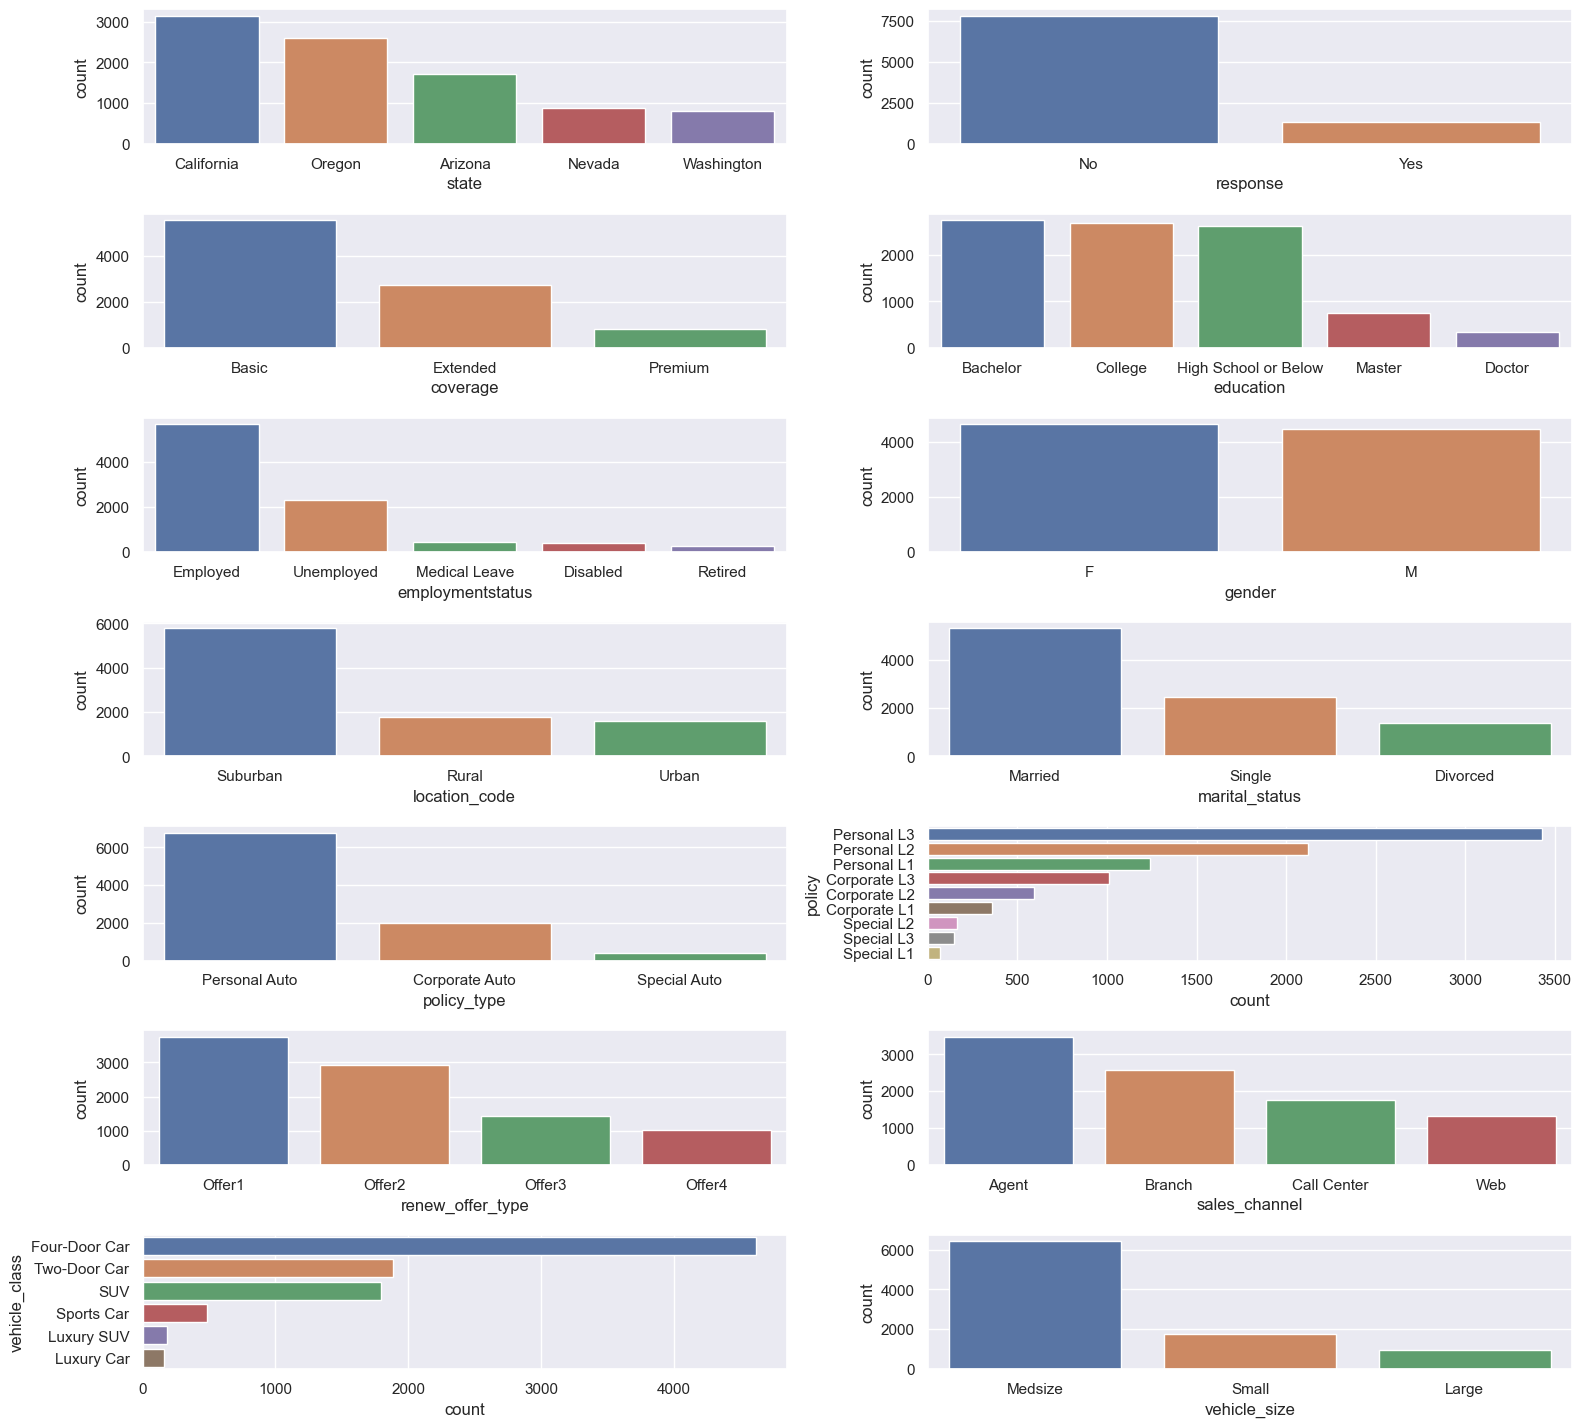

In [114]:
countplot1(cat_df)

In [115]:
#it looks better with the opposed axis so I will leave them both here 
def countplot2(df):    
    plt.figure(figsize=(16,16))
    # Loop through columns and create barplot for each one
    for col in df.columns:
        plt.subplot(len(df.columns)//2 + 1, 2, df.columns.get_loc(col) + 1)
        if df[col].nunique() >= 6:
            sns.countplot(data=df, x=col,order=list(df[col].value_counts().index)) #that list bit is sorting order
            plt.xlabel(col)
        else:
            sns.countplot(data=df, y=col,order=list(df[col].value_counts().index))
            plt.ylabel(col)
    
    plt.tight_layout()
    plt.show() 

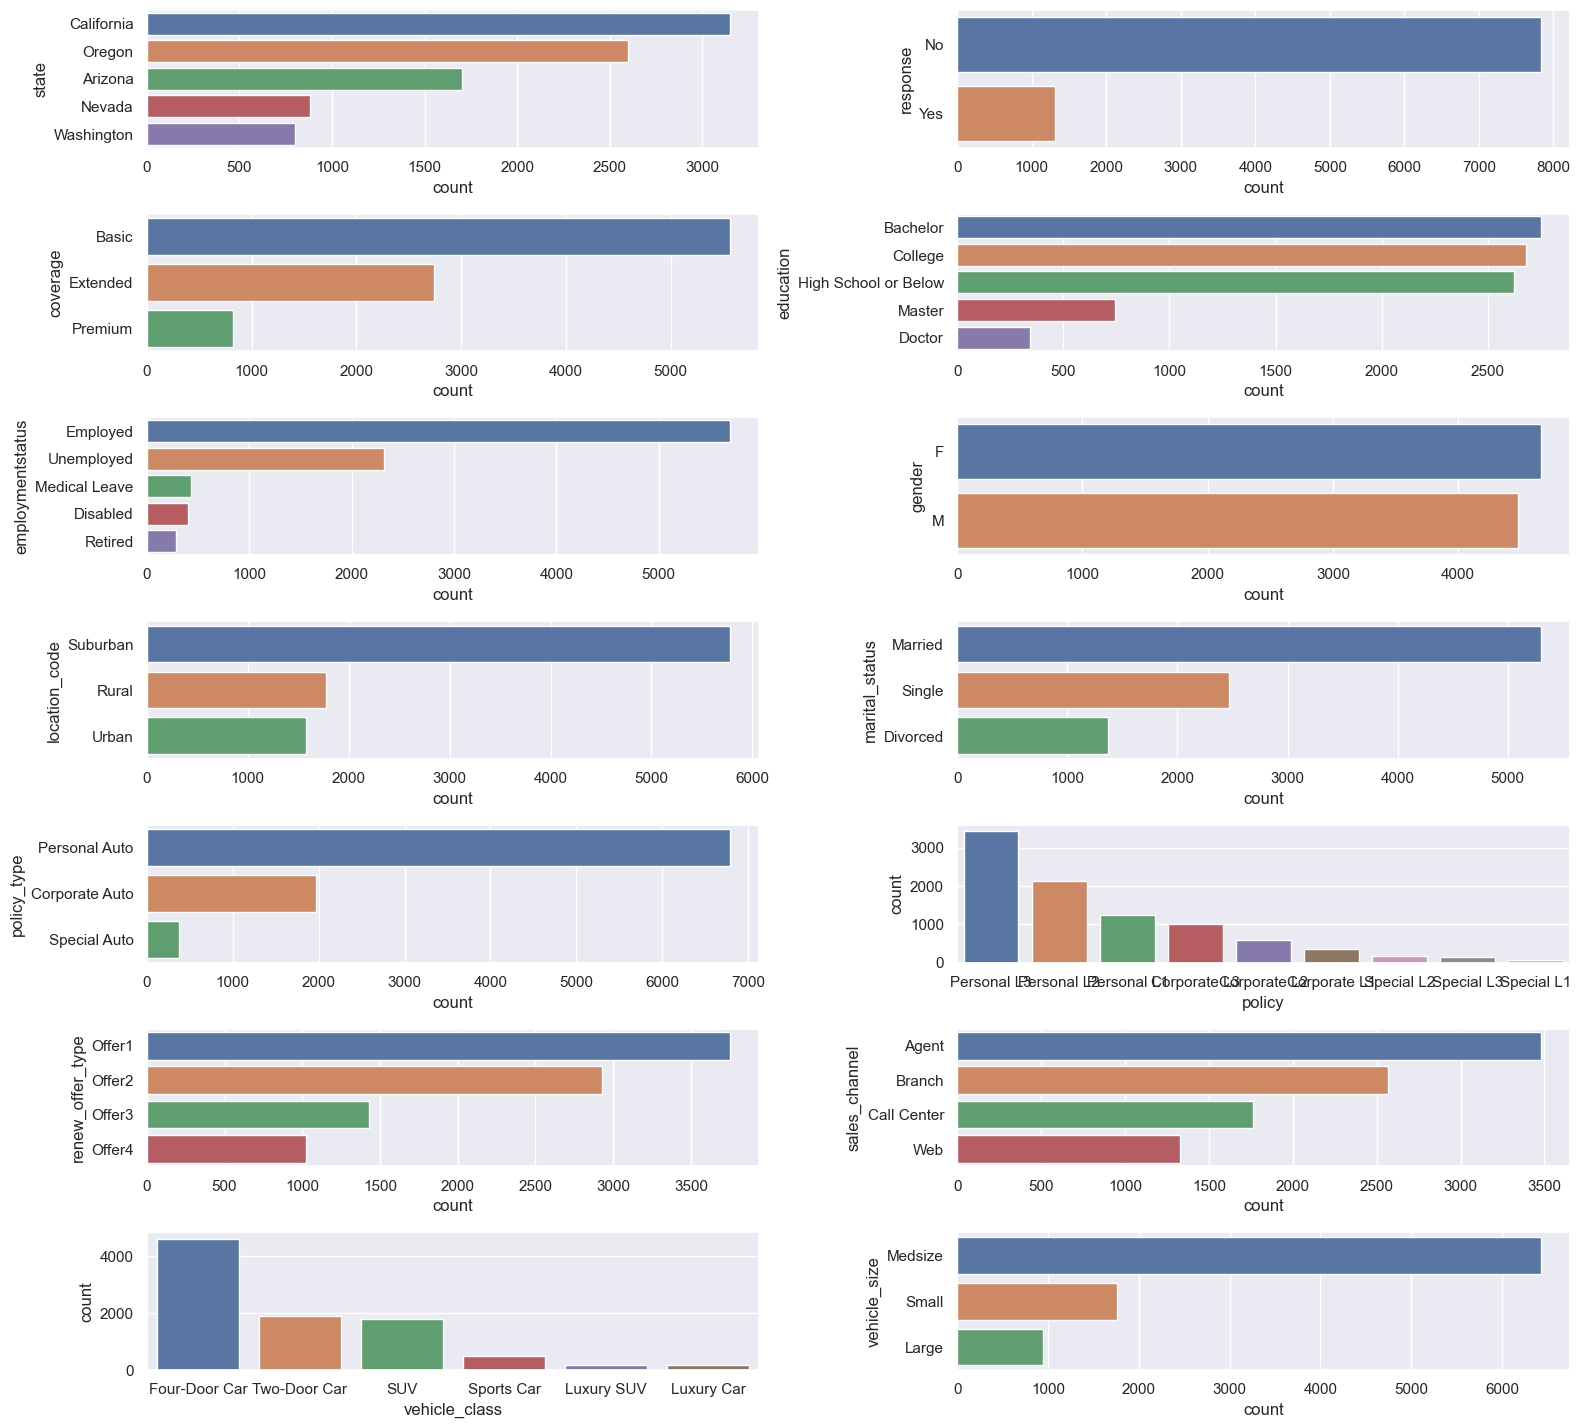

In [116]:
countplot2(cat_df)

In [119]:
## 2.policy_type and policy columns are redundant, and what's worse policy column has a lot of possible 
# unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder 
# because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and 
# transform the column policy to three possible values: L1, L2, and L3 using a function.

cat_df = cat_df.drop('policy_type', axis=1) 
cat_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [122]:
# now checking the unique values of policy

cat_df['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [ ]:
#def group_policy():
 #   import re
 #   df['policy'] = df['policy'].str.replace('$L3','L3')
  #  df['policy'] = df['policy'].str.replace('$L2','L2')
#    df['policy'] = df['policy'].str.replace('$L1','L1')
    



In [ ]:
#import re
#df2 = cat_df.apply(lambda x: x.replace({'L3$':'L3','L2$':'L2','L1$':'L1'}, regex=True))
#df2.head()

#can't find why this doesnt work so I will manually add all values to the function

In [155]:
import re
catdf = cat_df.apply(lambda x: x.replace({'Corporate L3':'L3','Personal L3':'L3','Special L3':'L3','Corporate L2':'L2','Special L2':'L2','Personal L2':'L2','Personal L1':'L1','Special L1':'L1','Corporate L1':'L1'}, regex=True))
catdf['policy'].unique()

#it surely can be done with regex match end of a string $ instead of one by one but I coult not make it work (see cell above)


array(['L3', 'L2', 'L1'], dtype=object)

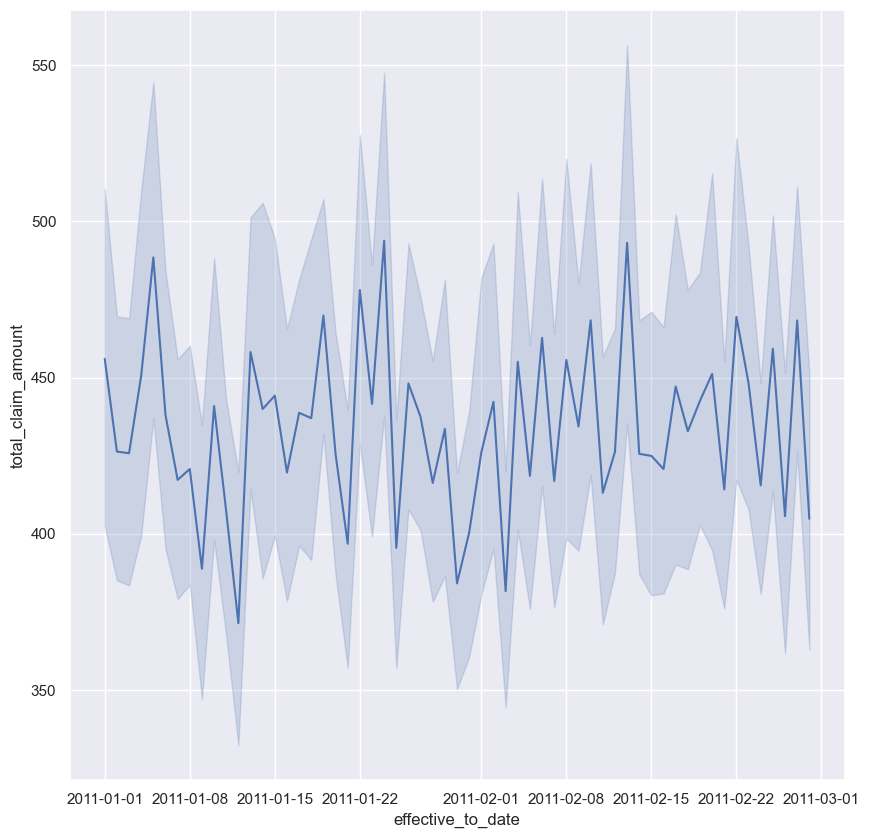

In [165]:
## 3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if 
# total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)


sns.set(rc={'figure.figsize':(10,10)})
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=continuous_df,legend='brief')
plt.show()



In [171]:
## 4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:
# day with the day number of effective_to_date
# day_name with the day NAME of effective_to_date
# week with the week of effective_to_date
# month with the month NAME of effective_to_date
# total_claim_amount with total_claim_amount


# define empty DataFrame
new_df = pd.DataFrame()

# add columns extracted from effective_to_date of num_df
new_df['day'] = num_df['effective_to_date'].dt.day
new_df['day_name'] = num_df['effective_to_date'].dt.day_name()
new_df['week'] = num_df['effective_to_date'].dt.isocalendar().week
new_df['month'] = num_df['effective_to_date'].dt.month_name()
new_df['total_claim_amount'] = num_df['total_claim_amount']

new_df.head()




,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


In [184]:
## 5. Compute the total target column aggregated day_name rounded to two decimals and then reorder 
# the index of the resulting pandas series using .reindex(index=list_of_correct_days)


# define the correct order of days
list_of_correct_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


#groupby day_name and the mean ot total_claim amount
new_df.groupby(['day_name']).agg({'total_claim_amount': np.mean}).round(2).reindex(index=list_of_correct_days)


,total_claim_amount
day_name,
Monday,428.56
Tuesday,432.46
Wednesday,443.54
Thursday,433.80
Friday,428.64
Saturday,435.26
Sunday,437.34


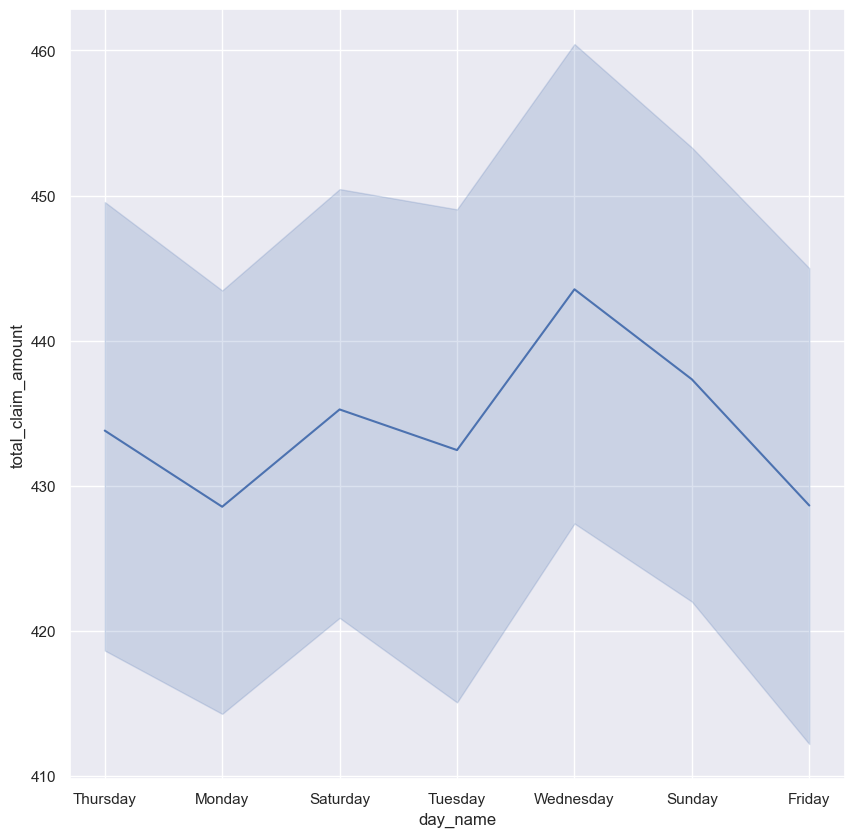

In [198]:
## 6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

sns.lineplot(x='day_name', y='total_claim_amount', data=new_df)

plt.show()

#Wednesdays are the day with the most difference in claim amount

In [183]:
## 7.Get the total number of claims by day of the week name and then reorder the index of 
# the resulting pandas series using .reindex(index=list_of_correct_values)


#groupby day_name and the mean ot total_claim amount
new_df.groupby(['day_name']).agg({'total_claim_amount': sum}).reindex(index=list_of_correct_days)





,total_claim_amount
day_name,
Monday,655689.707832
Tuesday,502518.931456
Wednesday,541563.053203
Thursday,541820.798820
Friday,533658.793865
Saturday,608060.101874
Sunday,581655.660204


In [196]:
## 8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()
new_df2 = new_df.groupby(['day_name']).agg({'total_claim_amount': np.median}).round(2).reindex(index=list_of_correct_days)

new_df2.sort_values(by=['total_claim_amount'], ascending=False)

,total_claim_amount
day_name,
Thursday,395.33
Wednesday,392.24
Monday,385.74
Sunday,383.72
Saturday,379.20
Tuesday,378.49
Friday,371.80


In [201]:
new_df2.head()

,total_claim_amount
day_name,
Monday,385.74
Tuesday,378.49
Wednesday,392.24
Thursday,395.33
Friday,371.80


In [203]:
new_df.groupby(['day_name']).agg({'total_claim_amount': np.median}).round(2).reindex(index=list_of_correct_days).sort_values(by=['total_claim_amount'], ascending=False)



,total_claim_amount
day_name,
Thursday,395.33
Wednesday,392.24
Monday,385.74
Sunday,383.72
Saturday,379.20
Tuesday,378.49
Friday,371.80


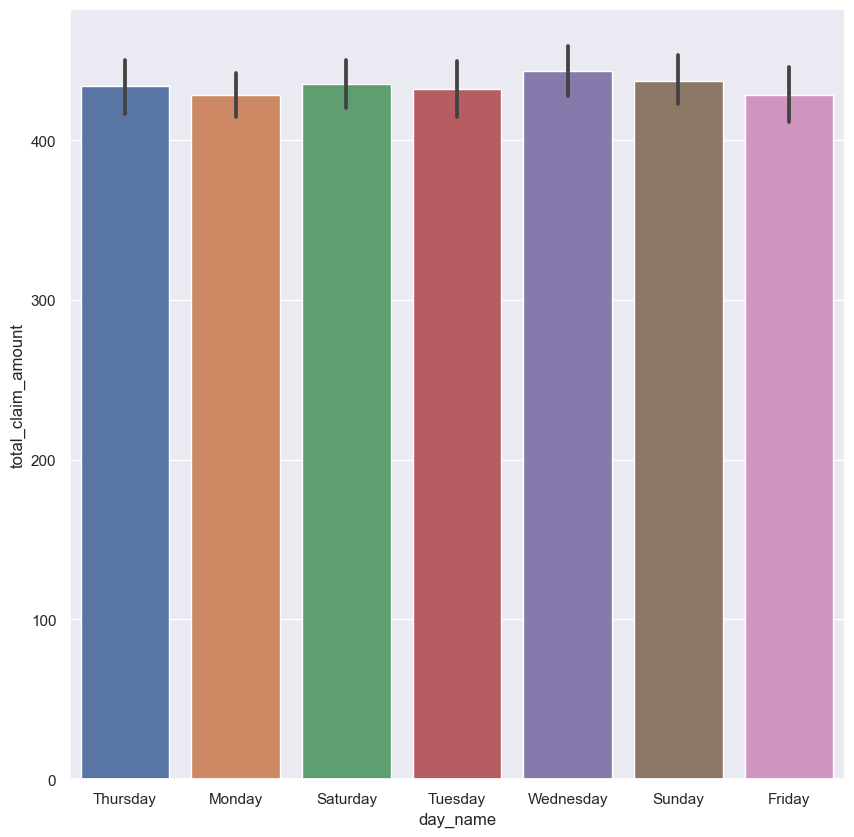

In [204]:
## 9. Plot the median "target" by day of the week name using a seaborn barplot


sns.barplot(x='day_name', y='total_claim_amount', data=new_df)

# Display the plot
plt.show()



In [ ]:
## 10. What can you conclude from this analysis?

# that wednesdays more claims are registered

In [205]:
## 11. Compute the total target column aggregated month rounded to two decimals and then reorder the index 
# of the resulting pandas series using .reindex(index=list_of_correct_values)

list_of_correct_values = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
new_df.groupby(['month']).agg({'total_claim_amount': np.mean}).round(2).reindex(index=list_of_correct_values)


,total_claim_amount
month,
January,432.25
February,436.22
March,NaN
April,NaN
May,NaN
June,NaN
July,NaN
August,NaN
September,NaN


In [ ]:
## 12. Can you do a monthly analysis given the output of the previous series? Why?

# No, because we have too many missing values

In [211]:
## 13. Define a function to remove the outliers of a numerical continuous column depending 
# if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).


def remove_outliers(df, thr=3):
    for col in df.columns:
        mean = df[col].mean()
        std  = df[col].std()
        lower = mean - thr*std
        upper = mean + thr*std

    df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df




In [215]:
## 14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

continuous_clean_df = remove_outliers(continuous_df, thr=3)
continuous_clean_df.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,2011-02-24,56274,69,5,384.811147
1,6979.535903,2011-01-31,0,94,42,1131.464935
2,12887.431650,2011-02-19,48767,108,38,566.472247
3,7645.861827,2011-01-20,0,106,65,529.881344
4,2813.692575,2011-02-03,43836,73,44,138.130879


In [220]:
## 15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. 
# After removing outliers the continuous_clean dataframe will have fewer rows 
# (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's 
# because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.


time_df = new_df.copy()
categorical_df = cat_df.copy()

#let's check them first
print(continuous_clean_df.shape) # it has less rows than the rest because of the outliers
print(discrete_df.shape)
print(categorical_df.shape)
print(time_df.shape)

time_df.head()


# X = pd.concat([x_normalized, onehot_encoded, labeled], axis=1)

(8976, 6)
(9134, 3)
(9134, 13)
(9134, 5)


,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879


In [249]:
dfconcat = pd.concat([continuous_clean_df, discrete_df, categorical_df,time_df], axis=1)
dfconcat.shape



(9134, 27)

In [250]:
dfconcat.dropna(inplace=True)
dfconcat.shape
#removed rows with NaNs

(8976, 27)

In [251]:
dfconcat.reset_index()
dfconcat.head()

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,2011-02-24,56274.0,69.0,5.0,384.811147,32,0,1,Washington,...,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147
1,6979.535903,2011-01-31,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,...,Personal L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935
2,12887.431650,2011-02-19,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,...,Personal L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247
3,7645.861827,2011-01-20,0.0,106.0,65.0,529.881344,18,0,7,California,...,Corporate L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344
4,2813.692575,2011-02-03,43836.0,73.0,44.0,138.130879,12,0,1,Washington,...,Personal L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879


In [252]:
## 16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

dfconcat.columns

Index(['customer_lifetime_value', 'effective_to_date', 'income',
       'monthly_premium_auto', 'months_since_policy_inception',
       'total_claim_amount', 'months_since_last_claim',
       'number_of_open_complaints', 'number_of_policies', 'state', 'response',
       'coverage', 'education', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'day', 'day_name', 'week', 'month',
       'total_claim_amount'],
      dtype='object')

In [253]:
## 17. Turn the response column values into (Yes=1/No=0).

#we do it with a lambda function
dfconcat['response'] = dfconcat['response'].apply(lambda x: 1 if x == 'Yes' else 0)
dfconcat['response']


0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    1
9131    0
9132    0
9133    0
Name: response, Length: 8976, dtype: int64

In [254]:
## 18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" 
# while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance 
# at the price of losing a level of detail.

dfconcat['education'] = dfconcat['education'].replace(['Master', 'Doctor'], 'Graduate')
dfconcat['education'].unique()


array(['Bachelor', 'College', 'Graduate', 'High School or Below'],
      dtype=object)

In [255]:
## 19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] 
# into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the 
# class imbalance at the price of losing a level of detail.

dfconcat['employmentstatus'] = dfconcat['employmentstatus'].replace(["Medical Leave", "Disabled", "Retired"], 'Inactive')
dfconcat['employmentstatus'].unique()



array(['Employed', 'Unemployed', 'Inactive'], dtype=object)

In [258]:
## 20. Deal with column Gender turning the values into (1/0).

#we do it with a lambda function like with yes/no earlier

dfconcat['gender'] = dfconcat['gender'].apply(lambda x: 1 if x == 'F' else 0)

dfconcat['gender'].unique()

array([1, 0])

In [259]:
## 21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" 
# into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit 
# the class imbalance at the price of losing a level of detail.


dfconcat['vehicle_class'] = dfconcat['vehicle_class'].replace(["Sports Car", "Luxury SUV", "Luxury Car"], 'Luxury')
dfconcat['vehicle_class'].unique()



array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury'], dtype=object)

In [273]:
## 22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each 
# unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

#import label encoder and create a copy of our df just in case 

from sklearn.preprocessing import LabelEncoder

dfconcat1 = dfconcat.copy()

# create a LabelEncoder object
le = LabelEncoder()

# specify the order of the coverage categories
ordering = ['Basic', 'Extended', 'Premium']
# use the order created
le.fit(ordering)

# transform the values in the "coverage" column using the fitted encoder
dfconcat1['coverage_code'] = le.transform(dfconcat1['coverage'])
dfconcat1.T.head(29)

,0,1,2,3,4,5,6,7,8,9,...,9123,9124,9126,9127,9128,9129,9130,9131,9132,9133
customer_lifetime_value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575,8256.2978,5380.898636,7216.100311,24127.50402,7388.178085,...,5678.050167,16261.5855,4628.995325,5032.165498,4100.398533,23405.98798,3096.511217,8163.890428,7524.442436,2611.836866
effective_to_date,2011-02-24 00:00:00,2011-01-31 00:00:00,2011-02-19 00:00:00,2011-01-20 00:00:00,2011-02-03 00:00:00,2011-01-25 00:00:00,2011-02-24 00:00:00,2011-01-18 00:00:00,2011-01-26 00:00:00,2011-02-17 00:00:00,...,2011-01-19 00:00:00,2011-01-20 00:00:00,2011-01-09 00:00:00,2011-02-12 00:00:00,2011-01-06 00:00:00,2011-02-10 00:00:00,2011-02-12 00:00:00,2011-02-06 00:00:00,2011-02-03 00:00:00,2011-02-14 00:00:00
income,56274.0,0.0,48767.0,0.0,43836.0,62902.0,55350.0,0.0,14072.0,28812.0,...,0.0,60646.0,0.0,66367.0,47761.0,71941.0,21604.0,0.0,21941.0,0.0
monthly_premium_auto,69.0,94.0,108.0,106.0,73.0,69.0,67.0,101.0,71.0,93.0,...,76.0,134.0,67.0,64.0,104.0,73.0,79.0,85.0,96.0,77.0
months_since_policy_inception,5.0,42.0,38.0,65.0,44.0,94.0,13.0,68.0,3.0,7.0,...,44.0,42.0,21.0,48.0,58.0,89.0,28.0,37.0,3.0,90.0
total_claim_amount,384.811147,1131.464935,566.472247,529.881344,138.130879,159.383042,321.6,363.02968,511.2,425.527834,...,364.8,643.2,482.4,307.2,541.282007,198.234764,379.2,790.784983,691.2,369.6
months_since_last_claim,32,13,18,18,12,14,0,0,13,17,...,8,31,25,6,16,18,14,9,34,3
number_of_open_complaints,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
number_of_policies,1,8,2,7,1,2,9,4,2,8,...,3,2,4,3,1,2,1,2,3,1
state,Washington,Arizona,Nevada,California,Washington,Oregon,Oregon,Arizona,Oregon,Oregon,...,California,California,California,California,California,California,California,California,California,California


In [268]:
dfconcat1['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [274]:
## 23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

# like we did in the activity before, create a LabelEncoder object
le = LabelEncoder()

# specify the order of the coverage categories
ordering = ['Unemployed', 'Inactive', 'Employed']
# use the order created
le.fit(ordering)

# transform the values in the "employmentstatus" column using the fitted encoder
dfconcat1['employmentstatus_code'] = le.transform(dfconcat1['employmentstatus'])
dfconcat1.T.head(30)

,0,1,2,3,4,5,6,7,8,9,...,9123,9124,9126,9127,9128,9129,9130,9131,9132,9133
customer_lifetime_value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575,8256.2978,5380.898636,7216.100311,24127.50402,7388.178085,...,5678.050167,16261.5855,4628.995325,5032.165498,4100.398533,23405.98798,3096.511217,8163.890428,7524.442436,2611.836866
effective_to_date,2011-02-24 00:00:00,2011-01-31 00:00:00,2011-02-19 00:00:00,2011-01-20 00:00:00,2011-02-03 00:00:00,2011-01-25 00:00:00,2011-02-24 00:00:00,2011-01-18 00:00:00,2011-01-26 00:00:00,2011-02-17 00:00:00,...,2011-01-19 00:00:00,2011-01-20 00:00:00,2011-01-09 00:00:00,2011-02-12 00:00:00,2011-01-06 00:00:00,2011-02-10 00:00:00,2011-02-12 00:00:00,2011-02-06 00:00:00,2011-02-03 00:00:00,2011-02-14 00:00:00
income,56274.0,0.0,48767.0,0.0,43836.0,62902.0,55350.0,0.0,14072.0,28812.0,...,0.0,60646.0,0.0,66367.0,47761.0,71941.0,21604.0,0.0,21941.0,0.0
monthly_premium_auto,69.0,94.0,108.0,106.0,73.0,69.0,67.0,101.0,71.0,93.0,...,76.0,134.0,67.0,64.0,104.0,73.0,79.0,85.0,96.0,77.0
months_since_policy_inception,5.0,42.0,38.0,65.0,44.0,94.0,13.0,68.0,3.0,7.0,...,44.0,42.0,21.0,48.0,58.0,89.0,28.0,37.0,3.0,90.0
total_claim_amount,384.811147,1131.464935,566.472247,529.881344,138.130879,159.383042,321.6,363.02968,511.2,425.527834,...,364.8,643.2,482.4,307.2,541.282007,198.234764,379.2,790.784983,691.2,369.6
months_since_last_claim,32,13,18,18,12,14,0,0,13,17,...,8,31,25,6,16,18,14,9,34,3
number_of_open_complaints,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
number_of_policies,1,8,2,7,1,2,9,4,2,8,...,3,2,4,3,1,2,1,2,3,1
state,Washington,Arizona,Nevada,California,Washington,Oregon,Oregon,Arizona,Oregon,Oregon,...,California,California,California,California,California,California,California,California,California,California


In [ ]:
## 24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".

# same old, same old...
le = LabelEncoder()

# specify the order of the coverage categories
ordering = ['Rural', 'Suburban', 'Urban']
# use the order created
le.fit(ordering)

# transform the values in the "employmentstatus" column using the fitted encoder
dfconcat1['location_code_code'] = le.transform(dfconcat1['location_code'])
dfconcat1.T.head(30)

In [275]:
## 25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

# and again and again (sing A Forest - The Cure while you read this)
le = LabelEncoder()

# specify the order of the coverage categories
ordering = ['Small', 'Medsize', 'Large']
# use the order created
le.fit(ordering)

# transform the values in the "employmentstatus" column using the fitted encoder
dfconcat1['vehicle_size_code'] = le.transform(dfconcat1['vehicle_size'])
dfconcat1.T.head(30)


,0,1,2,3,4,5,6,7,8,9,...,9123,9124,9126,9127,9128,9129,9130,9131,9132,9133
customer_lifetime_value,2763.519279,6979.535903,12887.43165,7645.861827,2813.692575,8256.2978,5380.898636,7216.100311,24127.50402,7388.178085,...,5678.050167,16261.5855,4628.995325,5032.165498,4100.398533,23405.98798,3096.511217,8163.890428,7524.442436,2611.836866
effective_to_date,2011-02-24 00:00:00,2011-01-31 00:00:00,2011-02-19 00:00:00,2011-01-20 00:00:00,2011-02-03 00:00:00,2011-01-25 00:00:00,2011-02-24 00:00:00,2011-01-18 00:00:00,2011-01-26 00:00:00,2011-02-17 00:00:00,...,2011-01-19 00:00:00,2011-01-20 00:00:00,2011-01-09 00:00:00,2011-02-12 00:00:00,2011-01-06 00:00:00,2011-02-10 00:00:00,2011-02-12 00:00:00,2011-02-06 00:00:00,2011-02-03 00:00:00,2011-02-14 00:00:00
income,56274.0,0.0,48767.0,0.0,43836.0,62902.0,55350.0,0.0,14072.0,28812.0,...,0.0,60646.0,0.0,66367.0,47761.0,71941.0,21604.0,0.0,21941.0,0.0
monthly_premium_auto,69.0,94.0,108.0,106.0,73.0,69.0,67.0,101.0,71.0,93.0,...,76.0,134.0,67.0,64.0,104.0,73.0,79.0,85.0,96.0,77.0
months_since_policy_inception,5.0,42.0,38.0,65.0,44.0,94.0,13.0,68.0,3.0,7.0,...,44.0,42.0,21.0,48.0,58.0,89.0,28.0,37.0,3.0,90.0
total_claim_amount,384.811147,1131.464935,566.472247,529.881344,138.130879,159.383042,321.6,363.02968,511.2,425.527834,...,364.8,643.2,482.4,307.2,541.282007,198.234764,379.2,790.784983,691.2,369.6
months_since_last_claim,32,13,18,18,12,14,0,0,13,17,...,8,31,25,6,16,18,14,9,34,3
number_of_open_complaints,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
number_of_policies,1,8,2,7,1,2,9,4,2,8,...,3,2,4,3,1,2,1,2,3,1
state,Washington,Arizona,Nevada,California,Washington,Oregon,Oregon,Arizona,Oregon,Oregon,...,California,California,California,California,California,California,California,California,California,California


In [281]:
## 26. Get a dataframe with the categorical nominal columns
#those with no implicit order...

cat_nom_df = dfconcat1[['state','gender','marital_status','sales_channel']].copy()
cat_nom_df.head()



,state,gender,marital_status,sales_channel
0,Washington,1,Married,Agent
1,Arizona,1,Single,Agent
2,Nevada,1,Married,Agent
3,California,0,Married,Call Center
4,Washington,0,Single,Agent


In [283]:
## 27. Create a list of named levels which that has as many elements as categorical nominal columns. 
# Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:

# levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]

# create an empty list first
levels = []

# loop over the columns of the dataframe
for col in cat_nom_df.columns:
    # get the unique values in the column
    unique_vals = cat_nom_df[col].unique().tolist()
    # add the unique values to levels list
    levels.append(unique_vals)

print(levels)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], [1, 0], ['Married', 'Single', 'Divorced'], ['Agent', 'Call Center', 'Web', 'Branch']]


In [312]:
## 28. Instantiate a sklearn OneHotEncoder with drop set to first and categories to levels

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop="first", categories=levels)
print(encoder.categories)

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'], [1, 0], ['Married', 'Single', 'Divorced'], ['Agent', 'Call Center', 'Web', 'Branch']]
